In [2]:
def generate_tail_light_image3(self, image):

    x1_new = self.vehicle.x + self.plate.xmin
    y1_new = self.vehicle.y + self.plate.ymin
    x2_new = self.vehicle.x + self.plate.xmax
    y2_new = self.vehicle.y + self.plate.ymax

    # print("mids from raws xyxy")
    # print(x1_new,y1_new,x2_new,y2_new)

    #get crop of original v4 for ratio
    w_new = self.vehicle.w
    h_new = self.vehicle.h

    x_m = int((x1_new + x2_new) * 0.5)
    y_m = int((y1_new + y2_new) * 0.5)

    self.xm = x_m
    self.ym = y_m

    # print("mids")
    # print(x_m,y_m)
    # print(f"from plate xxyy {self.plate.xmin,self.plate.xmax,self.plate.ymin,self.plate.ymax}")
    #moto, human and bike
    if self.vehicle.vehicle_type == 2:
        #pure plate from img, skipping v4 crop step
        print("norm car plate")

        x_adj = int(w_new * 0.27)
        #no need y_adj since ratio side will handle h
        y_adj = 1
        # y_adj = int(h_new * 0.8)

        #we can add slight offset here, but both x_adj sum must = 2
        x11 = x_m - int(1.025 * x_adj)
        print(f"x11 is {x11}")
        x22 = x_m + int(0.975 * x_adj)

        y11 = y_m - y_adj
        y22 = y_m + y_adj

        # y1_new = y1_new - y_adj
        # y2_new = y2_new + y_adj

    elif self.vehicle.vehicle_type == 6 or self.vehicle.vehicle_type == 7:
        #print("trigger truck n trains")
        x_adj = int(w_new * 0.4)
        #no need y_adj since ratio side will handle h
        y_adj = 1

        # x1_new = x1_new - x_adj
        # x2_new = x2_new + x_adj

        x11 = x_m - int(1.025 * x_adj)
        x22 = x_m + int(0.975 * x_adj)

        # y1_new = y_m - y_adj
        # y2_new = y_m + y_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj


        # x1_new = self.vehicle.x + self.plate.xmin * 0.4
        # y1_new = self.vehicle.y + self.plate.ymin * 0.4
        # x2_new = self.vehicle.x + self.plate.xmax * 1.1
        # y2_new = self.vehicle.y + self.plate.ymax * 1.1
    #bus
    elif self.vehicle.vehicle_type == 5:
        #print("trigger bus")
        x_adj = int(w_new * 0.28)
        #no need y_adj since ratio side will handle h
        y_adj = 1

        # x1_new = x1_new - x_adj
        # x2_new = x2_new + x_adj

        x11 = x_m - int(1.03 * x_adj)
        x22 = x_m + int(0.97 * x_adj)

        # y1_new = y_m - y_adj
        # y2_new = y_m + y_adj

        # y1_new = y1_new - y_adj
        # y2_new = y2_new + y_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj

    elif self.vehicle.vehicle_type == 0 or 1 or 3:
        #print("lp moto")
        # x_adj = int((x2_new - x1_new) * 0.1)
        # y_adj = int((y2_new - y1_new) * 0.1)
        #
        x_adj = int(w_new * 0.2)
        #no need y_adj since ratio side will handle h

        y_adj = 1
        # y_adj = int(x_adj/1.4)
        # y_adj = int(w_new * 0.6)
        # y_adj = int(h_new * 0.8)

        #we can add slight offset here, but both x_adj sum must = 2
        x11 = x_m - x_adj
        x22 = x_m + x_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj

    #truck and trains

    # x1_new = self.vehicle.x + self.plate.xmin * 0.4
    # y1_new = self.vehicle.y + self.plate.ymin * 0.3
    # x2_new = self.vehicle.x + self.plate.xmax * 1.3
    # y2_new = self.vehicle.y + self.plate.ymax * 1.4
    #normal


    cropped = image[int(y11) : int(y22), int(x11) : int(x22)]

    #tail_light = cropped

    #ratio-ing for lp_plus
    # if self.vehicle.vehicle_type == 0|1|3:
    #     print("ratio for moto")
    #     cch = cropped.shape[0]
    #     ccw = cropped.shape[1]
    #     factor = ccw / 14
    #     new_h = int(factor * 10)
    #     h_adj = int(0.5 * (new_h - (y2_new - y1_new)))

    #     tail_light = image[
    #                  int(y1_new) - h_adj : int(y2_new) + h_adj, int(x1_new) : int(x2_new)
    #                  ]
    # else:
    #     cch = cropped.shape[0]
    #     ccw = cropped.shape[1]
    #     factor = ccw / 14
    #     new_h = int(factor * 10)
    #     h_adj = int(0.5 * (new_h - (y2_new - y1_new)))
    #     tail_light = image[
    #                  int(y1_new) - h_adj : int(y2_new) + h_adj, int(x1_new) : int(x2_new)
    #                  ]

    cch = cropped.shape[0]
    ccw = cropped.shape[1]
    factor = ccw / 14
    new_h = int(factor * 10)
    h_adj = int(0.5 * (new_h - (y22 - y11)))

    print(f"vehicle type as of tail light {self.vehicle.vehicle_type}")

    if self.vehicle.vehicle_type == 0 or 1 or 3:
        tail_light = image[
                     int(y11) - int(1.7 * h_adj) : int(y22) + int(0.3 * h_adj), int(x11) : int(x22)
                     ]

    if self.vehicle.vehicle_type == 2:
        tail_light = image[
                     int(y11) - int(1.2 * h_adj) : int(y22) + int(0.8 * h_adj), int(x11) : int(x22)
                     ]

    else:
        tail_light = image[
                     int(y11) - int(h_adj) : int(y22) + int(h_adj), int(x11) : int(x22)
                     ]

    return tail_light

In [ ]:
def generate_tail_light_image2(self, image):

    x1_new = self.vehicle.x + self.plate.xmin
    y1_new = self.vehicle.y + self.plate.ymin
    x2_new = self.vehicle.x + self.plate.xmax
    y2_new = self.vehicle.y + self.plate.ymax

    # print("mids from raws xyxy")
    # print(x1_new,y1_new,x2_new,y2_new)

    #get crop of original v4 for ratio
    w_new = self.vehicle.w
    h_new = self.vehicle.h

    x_m = int((x1_new + x2_new) * 0.5)
    y_m = int((y1_new + y2_new) * 0.5)

    is_lower = None
    #
    if int(y1_new + 0.5(h_new)) < y_m:
        is_lower = True

    self.xm = x_m
    self.ym = y_m

    # print("mids")
    # print(x_m,y_m)
    # print(f"from plate xxyy {self.plate.xmin,self.plate.xmax,self.plate.ymin,self.plate.ymax}")
    #moto, human and bike
    if self.vehicle.vehicle_type == 2:
        #pure plate from img, skipping v4 crop step
        print("norm car plate")

        x_adj = int(w_new * 0.27)
        #no need y_adj since ratio side will handle h
        y_adj = 1
        # y_adj = int(h_new * 0.8)

        #we can add slight offset here, but both x_adj sum must = 2
        x11 = x_m - int(1.025 * x_adj)
        print(f"x11 is {x11}")
        x22 = x_m + int(0.975 * x_adj)

        y11 = y_m - y_adj
        y22 = y_m + y_adj

        # y1_new = y1_new - y_adj
        # y2_new = y2_new + y_adj

    elif self.vehicle.vehicle_type == 6 or self.vehicle.vehicle_type == 7:
        #print("trigger truck n trains")
        x_adj = int(w_new * 0.4)
        #no need y_adj since ratio side will handle h
        y_adj = 1

        # x1_new = x1_new - x_adj
        # x2_new = x2_new + x_adj

        x11 = x_m - int(1.025 * x_adj)
        x22 = x_m + int(0.975 * x_adj)

        # y1_new = y_m - y_adj
        # y2_new = y_m + y_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj


        # x1_new = self.vehicle.x + self.plate.xmin * 0.4
        # y1_new = self.vehicle.y + self.plate.ymin * 0.4
        # x2_new = self.vehicle.x + self.plate.xmax * 1.1
        # y2_new = self.vehicle.y + self.plate.ymax * 1.1
    #bus
    elif self.vehicle.vehicle_type == 5:
        #print("trigger bus")
        x_adj = int(w_new * 0.28)
        #no need y_adj since ratio side will handle h
        y_adj = 1

        # x1_new = x1_new - x_adj
        # x2_new = x2_new + x_adj

        x11 = x_m - int(1.03 * x_adj)
        x22 = x_m + int(0.97 * x_adj)

        # y1_new = y_m - y_adj
        # y2_new = y_m + y_adj

        # y1_new = y1_new - y_adj
        # y2_new = y2_new + y_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj

    elif self.vehicle.vehicle_type == 0 or 1 or 3:
        #print("lp moto")
        # x_adj = int((x2_new - x1_new) * 0.1)
        # y_adj = int((y2_new - y1_new) * 0.1)
        #
        x_adj = int(w_new * 0.2)
        #no need y_adj since ratio side will handle h

        y_adj = 1
        # y_adj = int(x_adj/1.4)
        # y_adj = int(w_new * 0.6)
        # y_adj = int(h_new * 0.8)

        #we can add slight offset here, but both x_adj sum must = 2
        x11 = x_m - x_adj
        x22 = x_m + x_adj

        y11 = y_m - y_adj
        y22 = y_m + y_adj

    #truck and trains

    # x1_new = self.vehicle.x + self.plate.xmin * 0.4
    # y1_new = self.vehicle.y + self.plate.ymin * 0.3
    # x2_new = self.vehicle.x + self.plate.xmax * 1.3
    # y2_new = self.vehicle.y + self.plate.ymax * 1.4
    #normal


    cropped = image[int(y11) : int(y22), int(x11) : int(x22)]

    #tail_light = cropped

    #ratio-ing for lp_plus
    # if self.vehicle.vehicle_type == 0|1|3:
    #     print("ratio for moto")
    #     cch = cropped.shape[0]
    #     ccw = cropped.shape[1]
    #     factor = ccw / 14
    #     new_h = int(factor * 10)
    #     h_adj = int(0.5 * (new_h - (y2_new - y1_new)))

    #     tail_light = image[
    #                  int(y1_new) - h_adj : int(y2_new) + h_adj, int(x1_new) : int(x2_new)
    #                  ]
    # else:
    #     cch = cropped.shape[0]
    #     ccw = cropped.shape[1]
    #     factor = ccw / 14
    #     new_h = int(factor * 10)
    #     h_adj = int(0.5 * (new_h - (y2_new - y1_new)))
    #     tail_light = image[
    #                  int(y1_new) - h_adj : int(y2_new) + h_adj, int(x1_new) : int(x2_new)
    #                  ]

    cch = cropped.shape[0]
    ccw = cropped.shape[1]
    factor = ccw / 14
    new_h = int(factor * 10)
    h_adj = int(0.5 * (new_h - (y22 - y11)))

    print(f"vehicle type as of tail light {self.vehicle.vehicle_type}")

    if self.vehicle.vehicle_type == 0 or 1 or 3:
        tail_light = image[
                     int(y11) - int(1.7 * h_adj) : int(y22) + int(0.3 * h_adj), int(x11) : int(x22)
                     ]

    if self.vehicle.vehicle_type == 2:
        if is_lower:
            tail_light = image[
                         int(y11) - int(1.3 * h_adj) : int(y22) + int(0.7 * h_adj), int(x11) : int(x22)
                         ]
        else:
            tail_light = image[
                         int(y11) - int(1.1 * h_adj) : int(y22) + int(0.9 * h_adj), int(x11) : int(x22)
                         ]

    else:
        tail_light = image[
                     int(y11) - int(h_adj) : int(y22) + int(h_adj), int(x11) : int(x22)
                     ]

    return tail_light

In [9]:
"""Vehicle Type
ratio = 251 x 183
2 : car
3 : motorcycle
5 : bus
6 : train (sometime model detect lorry as train)
7 : lorry
"""
import os
os.chdir(r'C:\\Users\\Sean Tan\\Desktop\\gitasyc\\anpr\\simple_worker')
import cv2
import pickle

import pandas as pd
from ast import literal_eval

from PIL import Image

import traceback
import matplotlib.pyplot as plt
from car import Vehicle
from enhance import perform_image_enhancement
from ocr import OCR
from plate import Plate
from ocr_rule import ocr_validation
import torch
import numpy as np
import re

In [5]:
class ANPR4:

    xm = None
    ym = None

    def __init__(self):
        self.ocr = OCR()
        self.plate = Plate()
        self.vehicle = Vehicle()

    def generate_tail_light_image(self, image):

        x1_new = self.vehicle.x + self.plate.xmin
        y1_new = self.vehicle.y + self.plate.ymin
        x2_new = self.vehicle.x + self.plate.xmax
        y2_new = self.vehicle.y + self.plate.ymax

        return y1_new,y2_new,x1_new,x2_new

In [18]:
peca = cv2.imread(r"C:\Users\Sean Tan\Desktop\whaka\bejj\myvi_autozoom_wholebody.jpg")

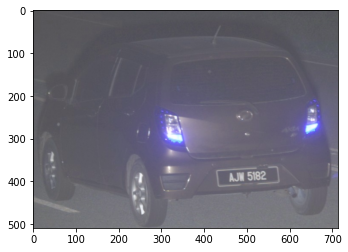

In [19]:
plt.imshow(peca)

In [20]:
scale_percent = 200 # percent of original size
width = int(peca.shape[1] * scale_percent / 100)
height = int(peca.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(peca, dim, interpolation = cv2.INTER_AREA)

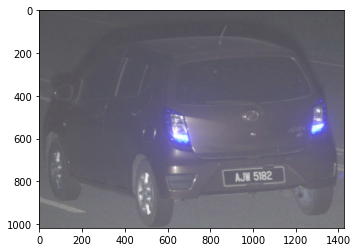

In [21]:
plt.imshow(resized)

In [24]:
cv2.imwrite(r"C:\Users\Sean Tan\Desktop\whaka\rejj\peca.jpg",resized)

True

In [10]:
anp = ANPR4()

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='models/ch_ppocr_mobile_v2.0_cls_train', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='models/en_PP-OCRv3_det_distill_train', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPP

YOLOv5  2022-7-18 Python-3.7.11 torch-1.10.2+cpu CPU

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 


In [14]:
anp.generate_tail_light_image(moto2)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

Populating the interactive namespace from numpy and matplotlib


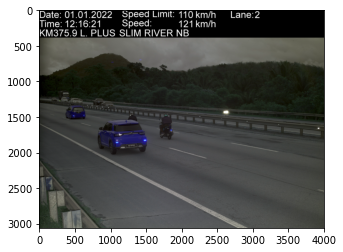

In [16]:
%pylab inline
plt.imshow(moto2)

In [13]:
#square
sq = cv2.imread(r"C:\Users\Sean Tan\Downloads\full_lane\B0013A1-110-20220414-053003-0014-2_A Scene Image.jpg")
#moto
car = cv2.imread(r"C:\Users\Sean Tan\Downloads\full_lane\B0013A1-110-20220413-140104-0026-2_A Scene Image.jpg")
#car
moto = cv2.imread(r"C:\Users\Sean Tan\Downloads\full_lane\B0013A1-110-20220414-083816-0026-2_A Scene Image.jpg")

moto2 = cv2.imread(r"C:\Users\Sean Tan\Desktop\robot_dev\scene_a_raw\0030D60CAFF0_0000912_726-520.jpg")
moto3 = cv2.imread(r"C:\Users\Sean Tan\Desktop\robot_dev\scene_a_raw\0030D60CAFF0_0000912_732-520.jpg")
waja = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\waja.jpg")
myvi = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\myvi.jpg")
ambu = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\ambu.jpg")
mpv = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\mpv.jpg")
mot1 = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\mot1.jpg")
mot22 = cv2.imread(r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\moto22.jpg")
camcode = "B0013A1-110"
lanenum = 2
input = r"C:\Users\Sean Tan\Desktop\test_images\GAMBAR KERETA\\"
output = r"C:\Users\Sean Tan\Desktop\whaka\bejj\\"
rej = r"C:\Users\Sean Tan\Desktop\whaka\rejj\\"
filen = "waja.jpg"
camcode = "A0083A1-250"
lanenum = 2